# Statistical Learning Project - Residency 1 

Think of yourself, currently working as a Business analyst in one of the top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament).

The data set contains information on all the teams so far participated in all the past tournaments. It has data about how many goals each team scored, conceded, how many times they came within first 6 positions, how many seasons they have qualified, their best position in the past etc.

In [1]:
"""
* The following assumes 'Jupyter Notebook' command is run where the dataset 'Laliga.csv' resides
* Configure os path accordingly if your current working directory is different
"""
#Importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the data set and replace dashes with 0 to make sure you can perform arithmetic operations on the data.

In [2]:
# Q1 (A) : Reading the data-set 
# The Column names are displaying as the first row. Hence setting the first Row as header.
la_liga = pd.read_csv(os.path.join('', 'Laliga.csv'),header=1)
# Q1 (B) : Replace dashes with zeros 
la_liga.replace('-',0,inplace=True)
display(la_liga)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


# Print all the teams which have started playing between 1930-1980.

In [3]:
# Debut column has 2 formats 1929 , 1931 - 32 , hence cleaning data by creating a copy
la_liga_teams_playing_from = la_liga.copy() 
# Adding a "started playing from" column for comparion using the first 4 digits of debut field.
la_liga_teams_playing_from['StartedPlayingFrom'] = la_liga_teams_playing_from['Debut'].str[:4]
# print(la_liga_teams_playing_from)
la_liga_teams_playing_from = la_liga_teams_playing_from.loc[(la_liga_teams_playing_from['StartedPlayingFrom'] >= '1930') & (la_liga_teams_playing_from['StartedPlayingFrom'] <= '1980')]
# Sort by order 
la_liga_teams_playing_from = la_liga_teams_playing_from.sort_values(by='StartedPlayingFrom')
# Dropping the extra column.
la_liga_teams_playing_from.drop('StartedPlayingFrom',axis=1,inplace=True)
# final output for teams which started playing between 1930 to 1980
la_liga_teams_playing_from[['Team','Debut']]

,Team,Debut
28,Alaves,1930-31
3,Valencia,1931-32
9,Real Betis,1932-33
17,Oviedo,1933-34
5,Sevilla,1934-35
25,Hercules,1935-36
15,Osasuna,1935-36
8,Zaragoza,1939-40
11,Celta Vigo,1939-40
27,Murcia,1940-41


# Print the list of teams which came Top 5 in terms of points.

In [4]:
"""
Modifying the numeric values of type of object to int64 based on a sample row from the data-set for arithmetic operations. 
"""
for col in la_liga:
    if(str(la_liga[col].iloc[5]).isdigit()):
        la_liga[col] = pd.to_numeric(la_liga[col])
#print(la_liga.dtypes)
top_5_teams_in_pts = la_liga.sort_values('Points',ascending = False).head(5)
top_5_teams_in_pts[['Team','Points']]

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


# Write a function with name “Goal_diff_count” which should return all the teams with their Goal Differences. Using the same function, find the team which has maximum and minimum goal difference.

Goal_diff_count = GoalsFor - GoalsAgainst

In [5]:
# method of getting the goal_count difference 
def Goal_diff_count(row):
    return row['GoalsFor'] - row['GoalsAgainst']

# Calculating the goal_count_diff for all the teams
la_liga['Goal_diff_count'] = la_liga.apply(Goal_diff_count, axis=1)

# Sorting the dataset based on "Goal_diff_count"
teams_by_Goal_diff_count = la_liga.sort_values('Goal_diff_count',ascending = False)
la_liga.drop('Goal_diff_count',axis=1,inplace=True)

# Maximum goal difference 
print('****************** Maximum Goal Difference *************************')
display(teams_by_Goal_diff_count.head(1)[['Team','Goal_diff_count']])

# Minimum goal difference 
print('****************** Minimum Goal Difference *************************')
display(teams_by_Goal_diff_count.tail(1)[['Team','Goal_diff_count']])

****************** Maximum Goal Difference *************************


,Team,Goal_diff_count
0,Real Madrid,2807


****************** Minimum Goal Difference *************************


,Team,Goal_diff_count
13,Racing Santander,-525


# Create a new column with name “Winning Percent” and append it to the data set 

Percentage of Winning = (GamesWon / GamesPlayed)*100

If there are any numerical error, replace it with 0%

Print the top 5 teams which has the highest Winning percentage

In [6]:
# Method to calculate the winning percentage and return 0% when there is a numerical error.
def calculate_winning_percent(row):
    try:
        return (row['GamesWon'] / row['GamesPlayed'])*100
    except ZeroDivisionError:        
        return 0
    except:
        print('** Unexpected Error Occured **')

    
# Create a new column with the name "Winning Percent" and append it to data-set
la_liga['Winning Percent'] = la_liga.apply(calculate_winning_percent, axis=1)
# display(la_liga)
# top 5 teams which has has highest winning percentage 
top_5_teams_with_highest_winning_percentage = la_liga.sort_values('Winning Percent',ascending = False)
display(top_5_teams_with_highest_winning_percentage.head(5)[['Team','Winning Percent']])

,Team,Winning Percent
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629


# Group teams based on their “Best position” and print the sum of their points for all positions

Eg: Best Position                Points

        1                              25000

        2                              7000     

BestPosition
1     27933
2      6904
3      5221
4      6563
5      1884
6      2113
7      1186
8      1134
9        96
10      450
11      445
12      511
14       71
15       14
16       81
17      266
19       81
20       34
Name: Points, dtype: int64

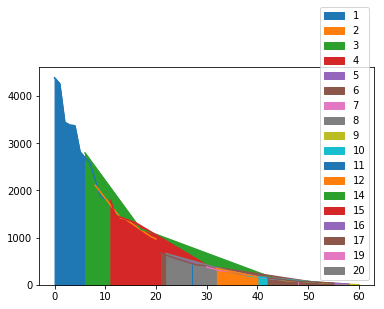

In [7]:
# Group teams based on best position 
teams_by_position = la_liga.groupby('BestPosition')
# print sum of their points for all positions 
display(teams_by_position['Points'].sum())


teams_by_position['Points'].plot(kind='area',legend=True)
plt.show()